# projectation with Logistic Regression

## The Dataset

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

You can read more about the data and the variables [here](https://www.kaggle.com/uciml/pima-indians-diabetes-database).

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

## Part A: 1 Mark

Read in the `diabetes.csv` dataset.

In [2]:
df = pd.read_csv('diabetes.csv')

## Part B: 1 Mark

Split the data into train and test.  Hold out 50% of observations as the test set.  Pass `random_state=0` to `train_test_split` to ensure you get the same train and tests sets as the solution.

In [3]:
#Defining X and y
y = df.Outcome
X = df.drop('Outcome', axis = 'columns')

#Splitting the data into training and testing sets 
Xtrain, Xtest, ytrain, ytest = train_test_split(X,
                                                y, 
                                                test_size = 0.5, 
                                                random_state = 0)

## Part C: 3 Marks

Read the documentation for [sklearn's `LogisticRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html).  In no more than 2 sentences per bullet point, answer the following in your own words.

* Does `LogisticRegression` use a penalty by default?  If yes, what penalty?  If it does, does this mean that `LogisticRegression` actually uses ridge regression or the LASSO as the default?



* What is the interpretation of the parmater `C`?  How does it relate to the regularization strength $\lambda$?



* If I were to ask you to use a regularization strengh of 2 (i.e. $\lambda=2$), what value of `C` would you pass?



Does LogisticRegression use a penalty by default? If yes, what penalty? If it does, does this mean that LogisticRegression actually uses ridge regression or the LASSO as the default?

Yes, it does. It uses the L2 norm or in other words the squared magnitude of the coefficient as the penalty term to the loss function. This means that LogisticRegression by default uses ridge regression.  


What is the interpretation of the parameter C? How does it relate to the regularization strength 𝜆?

The parameter C is the tuning parameter that describes how much we want to penalize the flexibility of our model. It's inversely related to the regularization strength 𝜆.

If I were to ask you to use a regularization strength of 2 (i.e.  𝜆=2 ), what value of C would you pass?

I would pass C = 0.5 

## Part D: 1 Mark

Create a pipeline for logistic regression (that is, the unpenalized version).  You will need to choose an alternative solver for `LogisticRegression` since the default solver does not support the no penalty option. Any solver will do, so just take a look at the docs to see what is available. I used `solver="newton-cg"` which seems to work fine.

If you get a warning about convergence of `coef_`, try increasing the `max_iter` parameter.  I used `max_iter=10000` which seems to supress the warning.

In [4]:
logit_pipe = Pipeline([
    ('logistic_regression', LogisticRegression(solver='newton-cg', 
                                              penalty='none',  
                                              max_iter = 10000))
])

## Part E: 3 Marks

Use your model to construct a confusion matrix by fitting and predicting on the training data (I've inlcluded a little helper function to make looking at the confusion matrix a little easier). Then answer the following using the confusion matrix (don't use sklearn's functions):

* What is your model's training accuracy?
* What is your model's training precision?
* What is your model's training recall?

Confusion matrix, without normalization


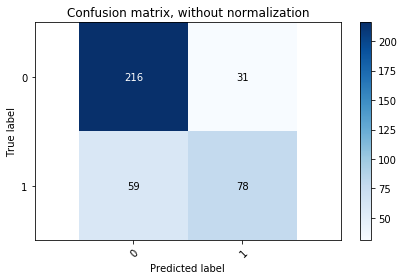

In [5]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    fig, ax = plt.subplots()
    ax.axis('equal')
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout();
    return ax


#Fitting and predicting on the training data 
lr = logit_pipe.fit(Xtrain, ytrain)
y_pred = lr.predict(Xtrain)

#Plotting confusion matrix
classes = np.array([0,1])  
plot_confusion_matrix(ytrain, y_pred, classes)

In [6]:
#From the confusion matrix we can define tp, tn, fp, and fn
tp = 78 
tn = 216
fp = 31
fn = 59

#Accuracy
acc = (tp + tn)/(tp + tn + fp + fn)
    
# Precision
precision = tp / (tp + fp)
    
# Recall
recall = tp / (tp + fn)


#Print results
print("The model's training accuracy is", acc)
print("The model's training precision is", precision)
print("The model's training recall is", recall)

The model's training accuracy is 0.765625
The model's training precision is 0.7155963302752294
The model's training recall is 0.5693430656934306


## Part F:  1 Mark

Estimate logistic regressions out of sample recall by using 5 fold cross validation.

In [7]:
cv = cross_val_score(logit_pipe, 
                    Xtest, 
                    ytest, 
                    cv = 5, 
                    scoring = 'recall')

out_sample_recall = cv.mean()

#Printing results
print("The estimated logistic regressions out of sample recall is", out_sample_recall)

The estimated logistic regressions out of sample recall is 0.5638176638176638


# Part F: 2 Marks

Create a new pipeline for either an l2 penalty in logistic regression or an l1 penalty.  Remember, penalized models perform best when you scale the inputs.  You should add `StandardScaler()` to your pipeline.

In [8]:
logit_pipe_l2 = Pipeline([
    ('scale', StandardScaler()), 
    ('logistic_regression', LogisticRegression(solver='newton-cg', 
                                              penalty='l2',  
                                              max_iter = 10000))
])

## Part F: 2 Marks

  Use sklearn's `GridSearchCV` to search over the regulatization strength ranging from 0.01 to 10 in 25 evenly spaced increments for you model.  Use recall as your metric for scoring.
  

`GridSearchCV` is a way to cross validate your models for a variety of parameters.  Read more about `GridSearchCV` [here](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).

In [9]:
#Defining the  regulatization strength range
range_dist = (10-0.01)/25
increments = np.arange(0.01,10,range_dist).tolist()


#Defining the dictionary for param_grid
param_grid = dict(logistic_regression__C=increments)


grid = GridSearchCV(logit_pipe_l2, param_grid, cv=5, scoring='recall')

## Part G: 1 Mark

What was the cross validated recall for your regularized model?  If you called your model grid search `lasso_gscv` you can access the best model's score by performing `lasso_gscv.best_score_`.


In [10]:
#Fitting the grid with data
grid.fit(Xtest,ytest)

print(f"The cross validated recall for the regularized modelis: {(grid.best_score_)}")

The cross validated recall for the regularized modelis: 0.5639133725071225


C:\Users\Moustafa\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


## Part H:  2 Marks

Print out the `C` parameter for your regualized model.  Answer the following:

* From this value what is the regularization strength $\lambda$?  



* In 1-2 sentences, would you prefer a regularized model for this dataset?  When might a regularized model make more sense?



In [11]:
#The parameter C
C = grid.best_params_.get('logistic_regression__C')

#Printing the results
print(f"The C parameter for the regulized model is: {C}")
print(f"The regularization strength 𝜆 is: {1/C}")

The C parameter for the regulized model is: 0.4096
The regularization strength 𝜆 is: 2.44140625


In 1-2 sentences, would you prefer a regularized model for this dataset? When might a regularized model make more sense?

I would rather prefer to use a regularized model when we have too many parameters for the given amount of data and are not sure which are important but we want to consider all of them. The more we regularize the less we fit the data, so we should only consider regularization when there is an added benefit.

# BONUS: 2 Marks

The following is a bonus question worth 2 marks. If you do not answer this question, there is no penalty.  You can't earn more than 100% on this assignment.

LASSO and other penalized estimators make the assumption that the model is what we call *sparse* (that means, not every variable is actually related to the outcome).  We can see which variables are more important than others by examining what is known as the *coefficient paths*.

Here are the steps to create the coefficient path:

1) Initialize an array of regularization strengths (typically going from something very small, maybe 0.1, to something very large, maybe 100.

2) For each regularization strength, fit your model.  Keep track of the coefficients.

3) Plot the coefficient values against the log of the regularization strength.


You've done this correctly if you can create a plot which looks like [this](https://cvxpy.readthedocs.io/en/latest/_images/lasso_regression_11_0.svg).

To earn the bonus marks, do the following:

* Construct the coefficient path for logistic regression with an l1 penalty.
* Determine which coefficient is most strongly related to the outcome be examining which coefficent reaches 0 last.




In [12]:
#Initializing an array of regularization strengths
reg_strength = np.arange(0.001, 20, 0.001)

#Empty arrays to keep track of coefficients 
coef_arr_1 = np.array([])
coef_arr_2 = np.array([])
coef_arr_3 = np.array([])
coef_arr_4 = np.array([])
coef_arr_5 = np.array([])
coef_arr_6 = np.array([])
coef_arr_7 = np.array([])
coef_arr_8 = np.array([])

#Normalizing the input data
X = (X - np.mean(X)) / np.std(X)

#For loop to fit the model for each given regularization strength 
for i in reg_strength:   
    
    #Fitting the model
    model = LogisticRegression(solver='saga', penalty='l1', C = i, max_iter = 10000)
    fitted_model = model.fit(X,y)

    #Extracting coefficients 
    coef_1 = fitted_model.coef_[0][0]
    coef_2 = fitted_model.coef_[0][1]
    coef_3 = fitted_model.coef_[0][2]
    coef_4 = fitted_model.coef_[0][3]
    coef_5 = fitted_model.coef_[0][4]
    coef_6 = fitted_model.coef_[0][5]
    coef_7 = fitted_model.coef_[0][6]
    coef_8 = fitted_model.coef_[0][7]
    
    #Keeping track of coefficients as we fit with different regularization strength
    coef_arr_1 = np.append(coef_arr_1, coef_1)
    coef_arr_2 = np.append(coef_arr_2, coef_2)
    coef_arr_3 = np.append(coef_arr_3, coef_3)
    coef_arr_4 = np.append(coef_arr_4, coef_4)
    coef_arr_5 = np.append(coef_arr_5, coef_5)
    coef_arr_6 = np.append(coef_arr_6, coef_6)
    coef_arr_7 = np.append(coef_arr_7, coef_7)
    coef_arr_8 = np.append(coef_arr_8, coef_8)

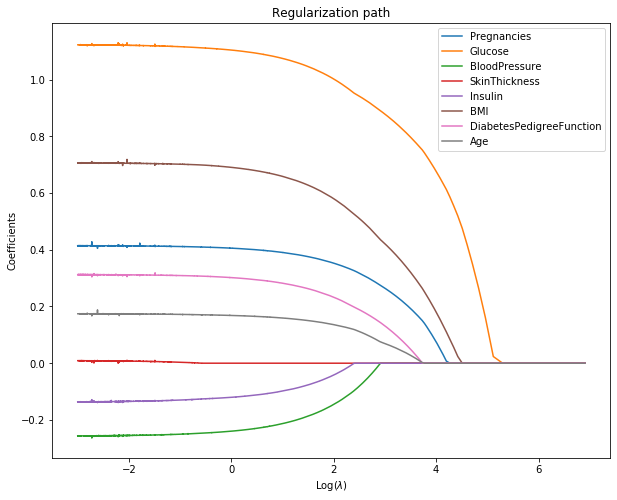

In [13]:
#Plotting the regulization path
plt.figure(figsize = (10,8))

plt.plot(np.log(1/reg_strength),coef_arr_1, label = X.columns[0])
plt.plot(np.log(1/reg_strength), coef_arr_2, label = X.columns[1])
plt.plot(np.log(1/reg_strength), coef_arr_3, label = X.columns[2])
plt.plot(np.log(1/reg_strength), coef_arr_4, label = X.columns[3])
plt.plot(np.log(1/reg_strength), coef_arr_5, label = X.columns[4])
plt.plot(np.log(1/reg_strength), coef_arr_6, label = X.columns[5])
plt.plot(np.log(1/reg_strength), coef_arr_7, label = X.columns[6])
plt.plot(np.log(1/reg_strength), coef_arr_8, label = X.columns[7])

plt.xlabel('Log($\\lambda$)')
plt.ylabel('Coefficients')
plt.title('Regularization path')
plt.legend()

Determine which coefficient is most strongly related to the outcome be examining which coefficient reaches 0 last.

From the regularization path above we can see that "Glucose" is the most strongly related coefficient to the outcome.